In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ankurzing_sentiment_analysis_for_financial_news_path = kagglehub.dataset_download('ankurzing/sentiment-analysis-for-financial-news')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projet DS/all-data (1).csv", encoding='latin-1')

In [ ]:
df.columns = ['sentiment', 'text']

In [ ]:
df.head()

,sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
df.tail()

,sentiment,text
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


In [ ]:
df.shape

In [ ]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
sentiment,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   text       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df.nunique()

,0
sentiment,3
text,4837


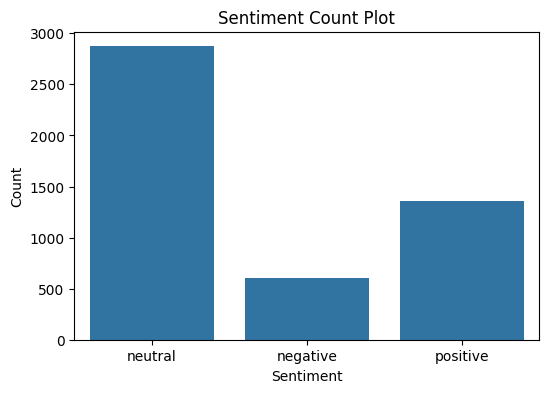

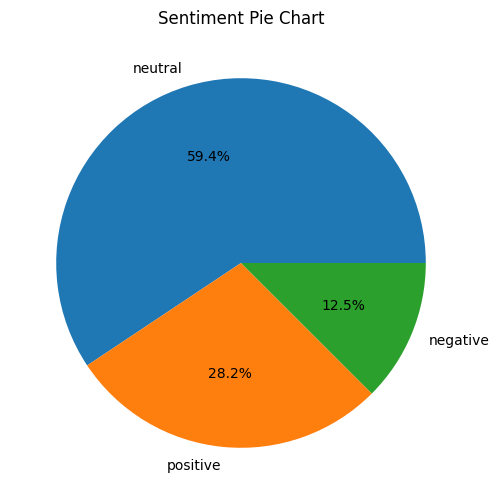

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Count Plot")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Pie Chart")
plt.ylabel("")
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = re.sub(r'\S+@\S+\.\S+', '', text)

    text = re.sub(r'@\w+|#\w+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df

,sentiment,text,clean_text
0,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...
1,negative,The international electronic industry company ...,international electronic industry company elco...
2,positive,With the new production plant the company woul...,new production plant company would increase ca...
3,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share price ended lower lon...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sale fell per cent million lit...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell eur mn eur mn including ...
4843,negative,Net sales of the Paper segment decreased to EU...,net sale paper segment decreased eur mn second...


In [ ]:
df = df[['clean_text', 'sentiment']]

In [ ]:
df

,clean_text,sentiment
0,technopolis plan develop stage area less squar...,neutral
1,international electronic industry company elco...,negative
2,new production plant company would increase ca...,positive
3,according company updated strategy year baswar...,positive
4,financing aspocomp growth aspocomp aggressivel...,positive
...,...,...
4840,london marketwatch share price ended lower lon...,negative
4841,rinkuskiai beer sale fell per cent million lit...,neutral
4842,operating profit fell eur mn eur mn including ...,negative
4843,net sale paper segment decreased eur mn second...,negative


In [ ]:
from sklearn.utils import resample

classes = df['sentiment'].unique()

max_count = df['sentiment'].value_counts().max()

df_list = []

for c in classes:
    df_class = df[df['sentiment'] == c]
    df_upsampled = resample(df_class,
                            replace=True,
                            n_samples=max_count,
                            random_state=42)
    df_list.append(df_upsampled)

df_balanced = pd.concat(df_list)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['sentiment'].value_counts())

sentiment
neutral     2872
positive    2872
negative    2872
Name: count, dtype: int64


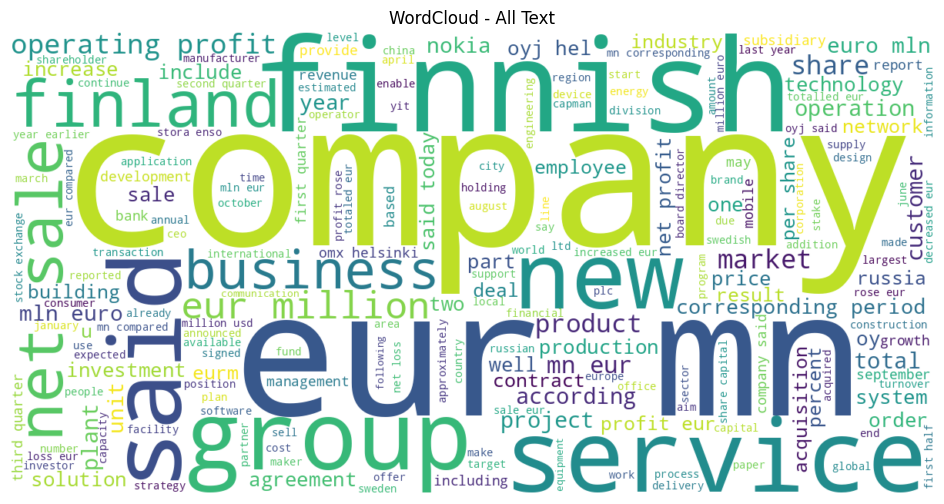

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['clean_text'])

wordcloud = WordCloud(width=1200, height=600,
                      background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - All Text")
plt.show()

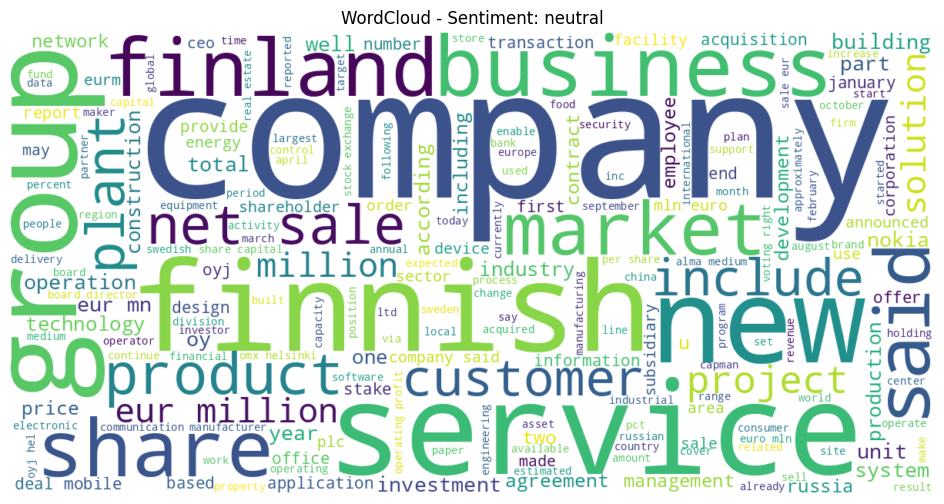

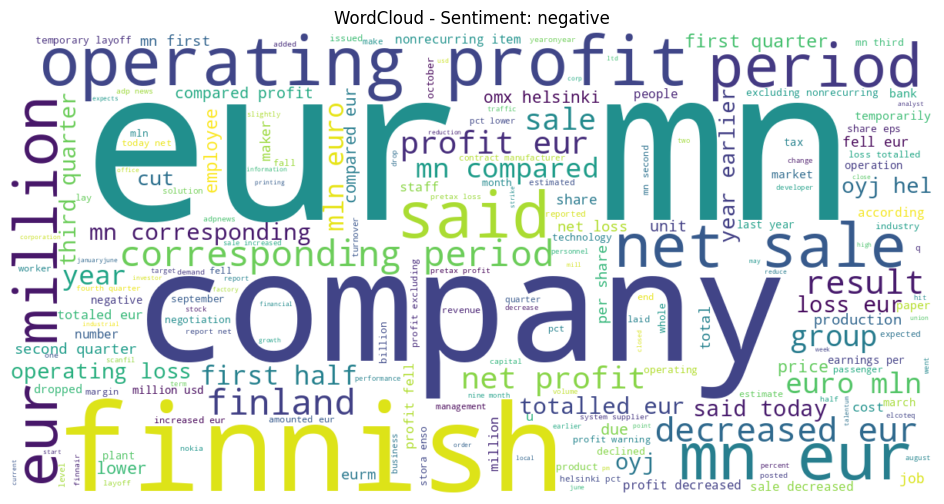

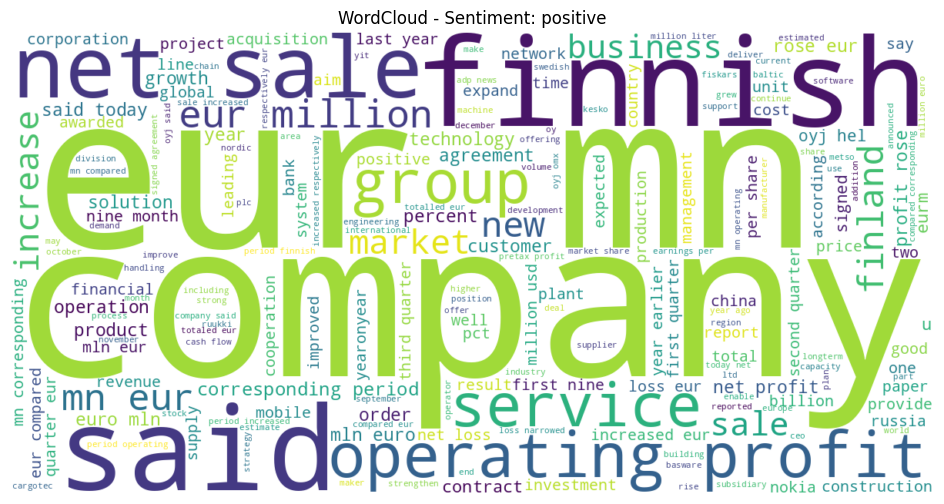

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unique_classes = df['sentiment'].unique()

for c in unique_classes:
    text = " ".join(df[df['sentiment'] == c]['clean_text'])

    wc = WordCloud(width=1200, height=600,
                   background_color='white').generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Sentiment: {c}")
    plt.show()

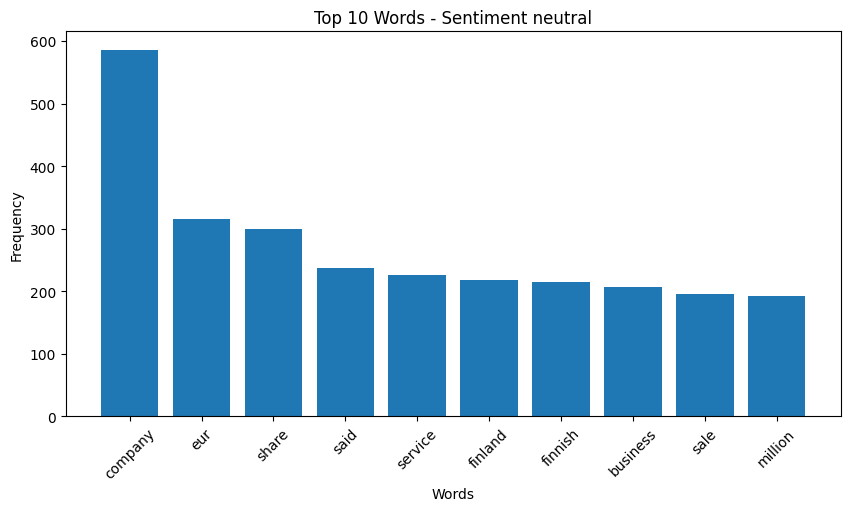

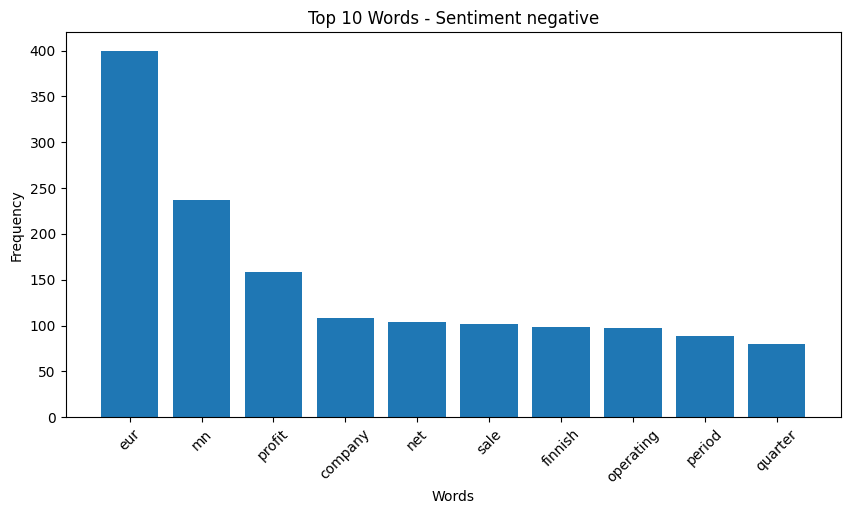

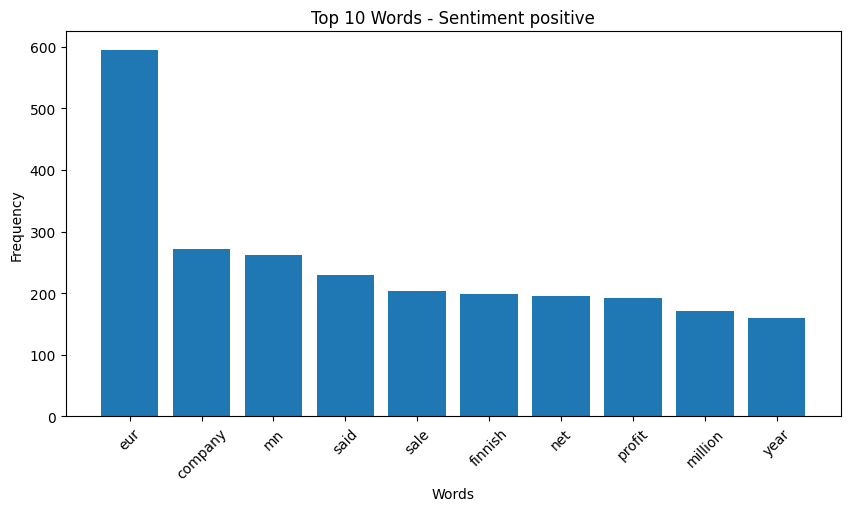

In [ ]:
from collections import Counter

def plot_top_words(df, sentiment_col='sentiment', text_col='clean_text', top_n=10):

    sentiments = df[sentiment_col].unique()

    for s in sentiments:

        texts = df[df[sentiment_col] == s][text_col]

        all_words = " ".join(texts).split()

        word_counts = Counter(all_words).most_common(top_n)

        words = [w for w, c in word_counts]
        counts = [c for w, c in word_counts]

        plt.figure(figsize=(10,5))
        plt.bar(words, counts)
        plt.title(f"Top {top_n} Words - Sentiment {s}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()

plot_top_words(df)

In [ ]:
mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df_balanced['sentiment_num'] = df_balanced ['sentiment'].map(mapping)

In [ ]:
df_balanced

,clean_text,sentiment,sentiment_num
0,alexandria va oct hansotto scheck espoo finlan...,neutral,0
1,boomerang boat net sale eur mn made operating ...,neutral,0
2,priority strengthen company balance sheet incr...,positive,1
3,performance impacted consolidation trend telec...,negative,-1
4,capital expenditure energy efficiency unfortun...,negative,-1
...,...,...,...
8611,finnish construction company yit reducing numb...,negative,-1
8612,finnish scanfil system supplier contract manuf...,negative,-1
8613,viking line canceled service,negative,-1
8614,company delivered technical infrastructure use...,neutral,0


In [ ]:
!pip install -q sentence-transformers scikit-learn torch torchvision tqdm

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

df_balanced = df_balanced.reset_index(drop=True)
label_map = {-1:0, 0:1, 1:2}
df_balanced["label_id"] = df_balanced["sentiment_num"].map(label_map)
texts = df_balanced["clean_text"].astype(str).tolist()
labels = df_balanced["label_id"].tolist()

embed_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embed_model.encode(texts, show_progress_bar=True, convert_to_numpy=True)

X_train_emb, X_test_emb, y_train, y_test, idx_train, idx_test = train_test_split(
    embeddings, labels, df_balanced.index.values, test_size=0.2, random_state=42, stratify=labels
)

class MoEDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_ds = MoEDataset(X_train_emb, y_train)
test_ds = MoEDataset(X_test_emb, y_test)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False)

class SwiGLU(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.fc2 = nn.Linear(dim, dim)
    def forward(self, x):
        return F.silu(self.fc1(x)) * self.fc2(x)

class Expert(nn.Module):
    def __init__(self, dim, hidden_mult=4):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim * hidden_mult)
        self.act = SwiGLU(dim * hidden_mult)
        self.fc2 = nn.Linear(dim * hidden_mult, dim)
    def forward(self, x):
        return self.fc2(self.act(self.fc1(x)))

class MoEHead(nn.Module):
    def __init__(self, dim, num_experts=4, k=2, num_classes=3):
        super().__init__()
        self.router = nn.Linear(dim, num_experts)
        self.experts = nn.ModuleList([Expert(dim) for _ in range(num_experts)])
        self.k = k
        self.classifier = nn.Linear(dim, num_classes)
    def forward(self, x):
        gate_logits = self.router(x)
        gate_probs = F.softmax(gate_logits, dim=-1)
        topk_vals, topk_idx = torch.topk(gate_probs, self.k, dim=-1)
        batch_size = x.size(0)
        expert_out = torch.zeros(batch_size, x.size(1), device=x.device)
        for i in range(self.k):
            idx = topk_idx[:, i]
            w = topk_vals[:, i].unsqueeze(-1)
            expert_inputs = x
            selected = torch.stack([self.experts[int(j)](expert_inputs[t]).unsqueeze(0) for t,j in enumerate(idx)], dim=0).squeeze(1)
            expert_out = expert_out + w * selected
        logits = self.classifier(expert_out)
        return logits, gate_probs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
moe = MoEHead(dim=X_train_emb.shape[1], num_experts=4, k=2, num_classes=3).to(device)
optimizer = torch.optim.Adam(moe.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(8):
    moe.train()
    loop = tqdm(train_loader, desc=f"MoE Train Epoch {epoch+1}")
    for Xb, yb in loop:
        Xb = Xb.to(device)
        yb = yb.to(device)
        logits, gate = moe(Xb)
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loop.set_postfix(loss=loss.item())

moe.eval()
all_preds_moe = []
with torch.no_grad():
    for Xb, _ in test_loader:
        Xb = Xb.to(device)
        logits, _ = moe(Xb)
        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        all_preds_moe.extend(preds.tolist())

print("MoE test accuracy:", accuracy_score(y_test, all_preds_moe))
print(classification_report(y_test, all_preds_moe, digits=4))

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
tfidf_fit_texts = df_balanced["clean_text"].astype(str).tolist()
tfidf_matrix = tfidf.fit_transform(tfidf_fit_texts)
X_train_tfidf = tfidf_matrix[idx_train]
X_test_tfidf = tfidf_matrix[idx_test]

agent2 = LogisticRegression(max_iter=1000)
agent2.fit(X_train_tfidf, np.array(y_train))
agent2_preds = agent2.predict(X_test_tfidf)
agent2_proba = agent2.predict_proba(X_test_tfidf)

agent3 = RandomForestClassifier(n_estimators=200, random_state=42)
agent3.fit(X_train_tfidf, np.array(y_train))
agent3_preds = agent3.predict(X_test_tfidf)
agent3_proba = agent3.predict_proba(X_test_tfidf)

def moe_predict_proba(emb_array):
    moe.eval()
    with torch.no_grad():
        X = torch.tensor(emb_array, dtype=torch.float32).to(device)
        logits, _ = moe(X)
        probs = F.softmax(logits, dim=-1).cpu().numpy()
    return probs

moe_test_proba = moe_predict_proba(X_test_emb)

meta_X = np.hstack([moe_test_proba, agent2_proba, agent3_proba])
meta_y = np.array(y_test)

meta_train_moe_proba = moe_predict_proba(X_train_emb)
meta_train_agent2_proba = agent2.predict_proba(X_train_tfidf)
meta_train_agent3_proba = agent3.predict_proba(X_train_tfidf)
meta_X_train = np.hstack([meta_train_moe_proba, meta_train_agent2_proba, meta_train_agent3_proba])
meta_y_train = np.array(y_train)

from sklearn.neural_network import MLPClassifier
meta_clf = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
meta_clf.fit(meta_X_train, meta_y_train)
meta_preds = meta_clf.predict(meta_X)
print("MoMoE (meta) accuracy:", accuracy_score(meta_y, meta_preds))
print(classification_report(meta_y, meta_preds, digits=4))

result_df = pd.DataFrame({
    "text": np.array(texts)[idx_test],
    "true": meta_y,
    "moe_pred": np.argmax(moe_test_proba, axis=1),
    "agent2_pred": agent2_preds,
    "agent3_pred": agent3_preds,
    "final_pred": meta_preds
})
result_df["true_label"] = result_df["true"].map({0:-1,1:0,2:1})
result_df["final_label"] = result_df["final_pred"].map({0:-1,1:0,2:1})
result_df.to_csv("momoe_results.csv", index=False)
print("Saved predictions to momoe_results.csv")

Batches:   0%|          | 0/270 [00:00<?, ?it/s]

MoE Train Epoch 2:  53%|█████▎    | 57/108 [01:44<01:33,  1.83s/it, loss=0.56]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_moe = confusion_matrix(y_test, all_preds_moe)
plt.figure(figsize=(6,4))
sns.heatmap(cm_moe, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MoE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

cm_momoe = confusion_matrix(meta_y, meta_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm_momoe, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - MoMoE (Meta Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

NameError: name 'all_preds_moe' is not defined